# Worksheet-3


### Task-1: Implementation of MCP Neurons

In [21]:
def MCP_Neurons_AND(X1, X2, T):
    """
    This functions implements basic AND operations with MCP Neuron for two inputs.
    Arguments:
    Inputs:
    X1 (1 nd array): An array of binary values.
    X2 (1 nd array): An array of binary values.
    Output:
    state_neuron(1D-list): An state of neuron 1 0r 0 for the particular inputs.
    """
    assert len(X1) == len(X2)
    ### YOUR CODE HERE ###
    state_neuron = []
    for x1, x2 in zip(X1, X2):
        if x1 == 0 and x2 == 0:  # Inhibitory condition
            state_neuron.append(0)
        else:
            sum_inputs = x1 + x2
            if sum_inputs >= T:
                state_neuron.append(1)
            else:
                state_neuron.append(0)
    return state_neuron
# Perform an element wise addition of two input arrays stored in a new array(list):
# Create a new array to put all the prediction let’s name that a state_neuron.
# Append 1 in sate_neuron if sum (element) of above list is above Threshold else append 0.


In [22]:
# Example usage for MCP_Neurons_AND function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 2 # Threshold value
# Call the MCP_Neurons_AND function
result = MCP_Neurons_AND(X1, X2, T)
# Print the result
print(f"Output of AND gate for inputs {X1} and {X2} with threshold {T}: {result}")

Output of AND gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 2: [0, 0, 0, 1]


## For "OR" Operations

In [24]:
def MCP_Neurons_OR(X1, X2, T):
    """
    This function implements basic OR operations with MCP Neuron for two inputs.
    Arguments:
    Inputs:
    X1 (1D array): An array of binary values.
    X2 (1D array): An array of binary values.
    Output:
    state_neuron (1D list): The state of the neuron (1 or 0) for the particular inputs.
    """
    assert len(X1) == len(X2)
    state_neuron = []
    for x1, x2 in zip(X1, X2):
        sum_inputs = x1 + x2
        if sum_inputs >= T:
            state_neuron.append(1)
        else:
            state_neuron.append(0)

### YOUR CODE HERE ###
# Perform an element wise addition of two input arrays stored in a new array(list):
# Create a new array to put all the prediction let’s name that a state_neuron.
# Append 1 in sate_neuron if sum (element) of above list is above Threshold else append 0.
    return state_neuron

In [25]:
# Example usage for MCP_Neurons_OR function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 1 # Threshold value for OR gate
# Call the MCP_Neurons_OR function
result_or = MCP_Neurons_OR(X1, X2, T)
# Print the result
print(f"Output of OR gate for inputs {X1} and {X2} with threshold {T}: {result_or}")

Output of OR gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 1: [0, 1, 1, 1]


### Question - 1:

List out all the limitations of MCP - Neurons.

1. Limited to Linearly Separable Problems: MCP neurons can only solve problems where the data is linearly separable. They fail to solve non-linearly separable problems like the XOR function.

2. No Learning Mechanism: MCP neurons do not have a learning algorithm. The weights and thresholds must be manually set, which is impractical for complex problems.

3. Binary Inputs and Outputs: MCP neurons only work with binary inputs (0 or 1) and produce binary outputs. This limits their ability to handle continuous or multi-class data.

4. No Bias Term: MCP neurons do not include a bias term, which limits their flexibility in modeling decision boundaries.

5. Fixed Threshold: The threshold value is fixed and must be handcrafted, making it difficult to adapt to different datasets.

## Question - 2:

Think if you can develop a logic to solve for XOR function using MCP Neuron.
{Can you devise a if else rules.}

No, the XOR function cannot be solved using a single MCP neuron because it is not linearly separable. The XOR function requires a non-linear decision boundary, which a single MCP neuron cannot model. To solve XOR, you would need a multi-layer network (e.g., a perceptron with hidden layers).

### Task 2: Perceptron Algorithm for 0 vs 1 Classification.

Load the Dataset

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Load the dataset
df_0_1 = pd.read_csv("mnist_0_and_1.csv") # Add the correct file path if necessary
# Extract features and labels
X = df_0_1.drop(columns=["label"]).values # 784 pixels
y = df_0_1["label"].values # Labels (0 or 1)
# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)

Feature matrix shape: (12665, 784)
Label vector shape: (12665,)


## Question - 1:

What does the shape of X represent?
The shape of the matrix represents a dataset consisiting of size 12665 x 784.
* The total number of images in the dataset 12665.
* The number of features (pixels) in each image (28*28=784)

## Question - 2:

What does the shape of Y represent?
The shape of Y represents a single column data with upto 12665 .

Visualize the Dataset:

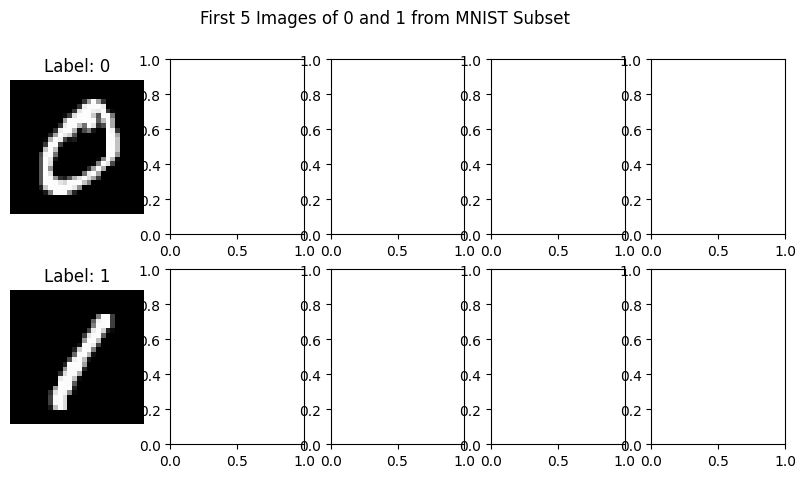

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [31]:
# Separate images for label 0 and label 1
images_0 = X[y == 0] # Get all images with label 0
images_1 = X[y == 1] # Get all images with label 1
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
# Check if the arrays have the required amount of data
if len(images_0) < 5 or len(images_1) < 5:
    print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 0
        axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 0")
        axes[0, i].axis("off")
        # Plot digit 1
        axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 1")
        axes[1, i].axis("off")
        plt.suptitle("First 5 Images of 0 and 1 from MNIST Subset")
        plt.show()

Initialize Weights and Bias:

In [33]:
# Initialize weights and bias
weights = np.zeros(X.shape[1]) # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

Question - 3:

What does the weights array represent in this context?

The weights array represents the learned parameters of the Perceptron model. Each weight corresponds to the importance of a specific feature (pixel) in making predictions. 

If weights.shape is (784,), it means there is one weight for each of the 784 pixels in the images.


Question - 4:

Why are we initializing the weights to zero? What effect could this
have on the training process?

* Initialization to Zero: We initialize the weights to zero to start the training process from a neutral state. This ensures that the model has no prior bias toward any specific feature.

* Effect on Training:

  * Advantage: Starting from zero ensures symmetry in the learning process.

  * Disadvantage: If all weights are zero, the model may take longer to converge because the initial updates are based solely on the input data.

Implement a Decision Function or Activation Function:

In [49]:
import numpy as np
def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.
    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training
    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    predictions = np.dot(X, weights) + bias
    #####Your Code Here############ # Activation function (step function)
    y_pred_all = np.where(predictions >= 0, 1, 0)
    return y_pred_all

Implement the Perceptron Learning Algorithm:

In [50]:
import numpy as np
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.
    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)
    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Total correct prediction.
    """
    # Step 3: Perceptron Learning Algorithm
    # Your Code here#
    for epoch in range(epochs):
        for i in range(len(X)):
            output = np.dot(X[i], weights) + bias
            y_pred = 1 if output >= 0 else 0
            if y_pred != y[i]:
                weights += learning_rate * (y[i] - y_pred) * X[i]
                bias += learning_rate * (y[i] - y_pred)
        # Calculate accuracy
        y_pred_all = decision_function(X, weights, bias)
        accuracy = np.mean(y_pred_all == y)
    return weights, bias, accuracy

Question - 5: What is the purpose of the output = np.dot(X[i], weights) + bias line?

The purpose of this line is to compute the weighted sum of the inputs for a single sample. It calculates:

* np.dot(X[i], weights): The dot product of the input features and the weights.

* +bias: Adds the bias term to the weighted sum.
This value is used to make a prediction using the step function.

Question - 6: What happens when the prediction is wrong? How are the weights and
bias updated?

* When the prediction is wrong (y_pred != y[i]), the weights and bias are updated using the Perceptron learning rule:

    * Weight Update:
weights += learning_rate * (y[i] - y_pred) * X[i]

    * Bias Update:
bias += learning_rate * (y[i] - y_pred)

* The updates adjust the weights and bias to reduce the prediction error for the current sample.


Question - 7: Why is the final accuracy important, and what do you expect it to be?

* Importance of Final Accuracy: The final accuracy measures how well the Perceptron model performs on the training data. It indicates the percentage of correctly classified samples.

* Expected Accuracy: For linearly separable data (like 0 vs 1 in MNIST), the Perceptron should achieve 100% accuracy if it converges. However, if the data is not perfectly separable, the accuracy may be lower.


In [57]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias, learning_rate, epochs)
# Evaluate the model using the new function
print(f"The Final Accuracy is: , {accuracy:.4f}")

The Final Accuracy is: , 1.0000


Visualizing the Misclassified Image:

Final Accuracy: 0.9998


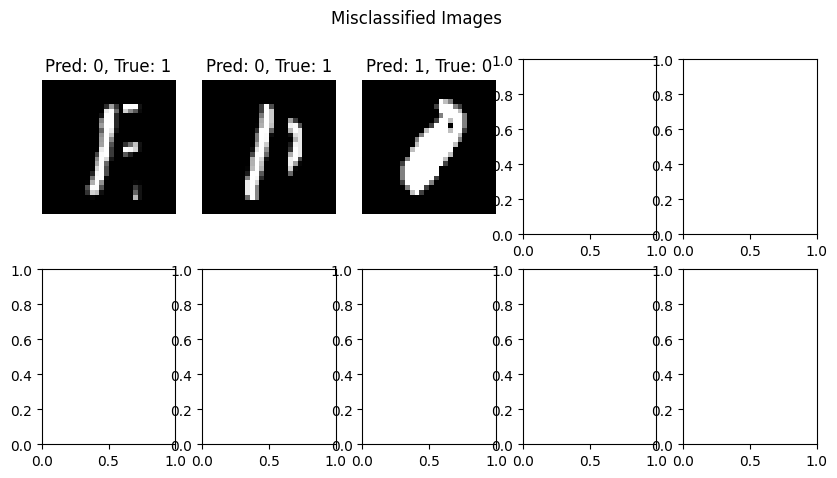

In [48]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)
# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")
# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]): # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")

Question - 8:What does misclassified idx store, and how is it used in this code?
* misclassified_idx: This stores the indices of the samples that were misclassified by the Perceptron model.

* Usage: It is used to identify and visualize the images that the model predicted incorrectly. The code plots the first 10 misclassified images.

Question - 9: How do you interpret the result if the output is ”All images were
correctly classified!”?

If the output is "All images were correctly classified!", it means:

* The Perceptron model achieved 100% accuracy on the training data.

* The model successfully learned a decision boundary that separates the two classes (0 and 1) without any errors.

Task 3: Perceptron Algorithm for 3 vs 5 Classification.

Load the MNIST dataset containing only digits 3 and 5 (mnist_3_and_5.csv).

In [58]:
# Load the dataset
df_3_5 = pd.read_csv("mnist_3_and_5.csv")  # Make sure the file path is correct

# Extract features and labels
X = df_3_5.drop(columns=["label"]).values  # Features (784 pixels)
y = df_3_5["label"].values  # Labels (3 or 5)

# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)  # Should be (n_samples, 784)
print("Label vector shape:", y.shape)  # Should be (n_samples,)

Feature matrix shape: (2741, 784)
Label vector shape: (2741,)


Question 1: What does the shape of X represent?

The shape of X represents the number of samples and the number of features in the dataset. For example, if X.shape is (n_samples, 784), it means:

* n_samples: The number of images (samples) in the dataset.

* 784: The number of features (pixels) in each image (28x28 = 784).

##  Visualize the Dataset

Visualize some images from the dataset.

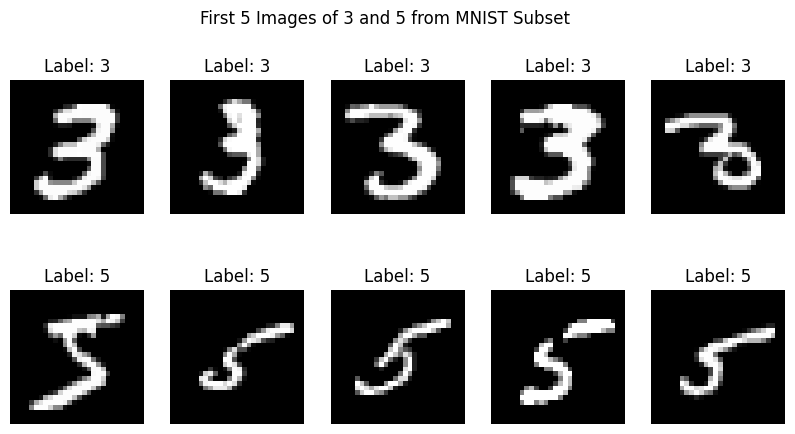

In [59]:
# Separate images for label 3 and label 5
images_3 = X[y == 3]  # Get all images with label 3
images_5 = X[y == 5]  # Get all images with label 5

# Plot the first 5 images of 3 and 5
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i in range(5):
    # Plot digit 3
    axes[0, i].imshow(images_3[i].reshape(28, 28), cmap="gray")
    axes[0, i].set_title("Label: 3")
    axes[0, i].axis("off")
    # Plot digit 5
    axes[1, i].imshow(images_5[i].reshape(28, 28), cmap="gray")
    axes[1, i].set_title("Label: 5")
    axes[1, i].axis("off")
plt.suptitle("First 5 Images of 3 and 5 from MNIST Subset")
plt.show()

## Train the Perceptron

Use the same train_perceptron function from Task 2 to train the model.

In [60]:
# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

# Train the Perceptron
weights, bias, accuracy = train_perceptron(X, y, weights, bias, learning_rate, epochs)
print(f"Final Accuracy: {accuracy:.4f}")

Final Accuracy: 0.0000


## Visualize Misclassified Images

### Visualize the misclassified images.

Final Accuracy: 0.0000


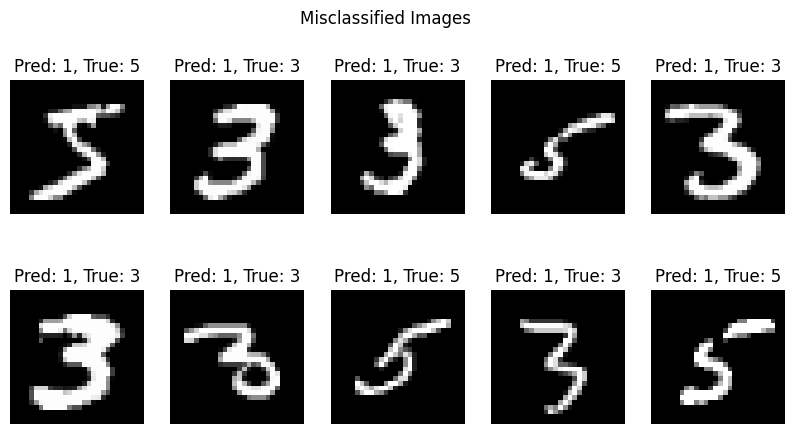

In [61]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Visualize misclassified images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")